In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def oscillatorModelOde(t, Y, can): 

    #parameters from can: [ka1, kb1, ka2, kb2, ka3, kb3, ka4, kb4, kcat4, ka5, kb5, kcat5, ka6, kb6]
    #comment units 
    ka1 = can[0] #uM^-1s^-1
    kb1 = can[1] #s^-1
    ka2 = can[2] #uM^-1s^-1
    kb2 = can[3] #s^-1
    ka3 = can[4] #uM^-1s^-1
    kb3 = can[5] #s^-1
    ka4 = can[6] #uM^-1s^-1
    kb4 = can[7] #s^-1
    kcat4 = can[8] #s^-1
    ka5 = can[9] #uM^-1s^-1
    kb5 = can[10] #s^-1
    kcat5 = can[11] #s^-1
    ka6 = can[12] #uM^-1s^-1
    kb6 = can[13] #s^-1


    #initial conditions: [Ap(t), B(t), ABdimer(t), ABg(t), X(t), K(t), Kseq(t), A(t), KA(t), P(t), PAp(t), Xseq(t)]
    Ap = Y[0]
    B = Y[1]
    ABdimer = Y[2]
    ABg = Y[3]
    X = Y[4]
    K = Y[5]
    Kseq = Y[6]
    A = Y[7]
    KA = Y[8]
    P = Y[9]
    PAp = Y[10]
    Xseq = Y[11]

    dAp = kb1*ABdimer + kb5*PAp + kcat4*KA - ka1*Ap*B - ka5*Ap*P
    dB = kb1*ABdimer - ka1*Ap*B
    dABdimer = kb2*ABg*X + ka1*Ap*B - ka2*ABdimer - kb1*ABdimer
    dABg = ka2*ABdimer - kb2*ABg*X
    dX = kb6*Xseq - ka6*ABg*X
    dK = kb4*KA + kcat4*KA + kb3*ABg*Kseq - ka4*A*K - ka3*ABg*K
    dKseq = ka3*ABg*K - kb3*ABg*Kseq
    dA = kb4*KA + kcat5*PAp - ka4*A*K
    dKA = ka4*A*K - kb4*KA - kcat4*KA
    dP = kb5*PAp + kcat5*PAp - ka5*Ap*P
    dPAp = ka5*Ap*P - kb5*PAp - kcat5*PAp
    dXseq = ka6*ABg*X - kb6*Xseq



    dAp = kb1*ABdimer + kb5*PAp + kcat4*KA - ka1*Ap*B - ka5*Ap*P
    dB = kb1*ABdimer - ka1*Ap*B
    dABdimer = kb2*ABg*X + ka1*Ap*B - ka2*ABdimer - kb1*ABdimer
    dABg = ka2*ABdimer - kb2*ABg*X
    dX = kb6*Xseq - ka6*ABg*X
    dK = kb4*KA + kcat4*KA + kb3*ABg*Kseq - ka4*A*K - ka3*ABg*K
    dKseq = ka3*ABg*K - kb3*ABg*Kseq
    dA = kb4*KA + kcat5*PAp - ka4*A*K
    dKA = ka4*A*K - kb4*KA - kcat4*KA
    dP = kb5*PAp + kcat5*PAp - ka5*Ap*P
    dPAp = ka5*Ap*P - kb5*PAp - kcat5*PAp
    dXseq = ka6*ABg*X - kb6*Xseq

    return [dAp, dB, dABdimer, dABg, dX, dK, dKseq, dA, dKA, dP, dPAp, dXseq]

In [6]:
pmap= [10., 20., 4., 50., 60.,  7.,  9.,  10.,  100., 11., 12., 13.,  20.,  5.] 
umap = [0., 100., 0.,  0., 100.,  10.,  0.,  100.,  0.,  10.,  0., 0.]

#solve with odeint
t = np.linspace(0, 10, 10000)
# Y0 = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

Ysol = solve_ivp(oscillatorModelOde, (0,10), umap, args=(pmap,))
Y = Ysol.y


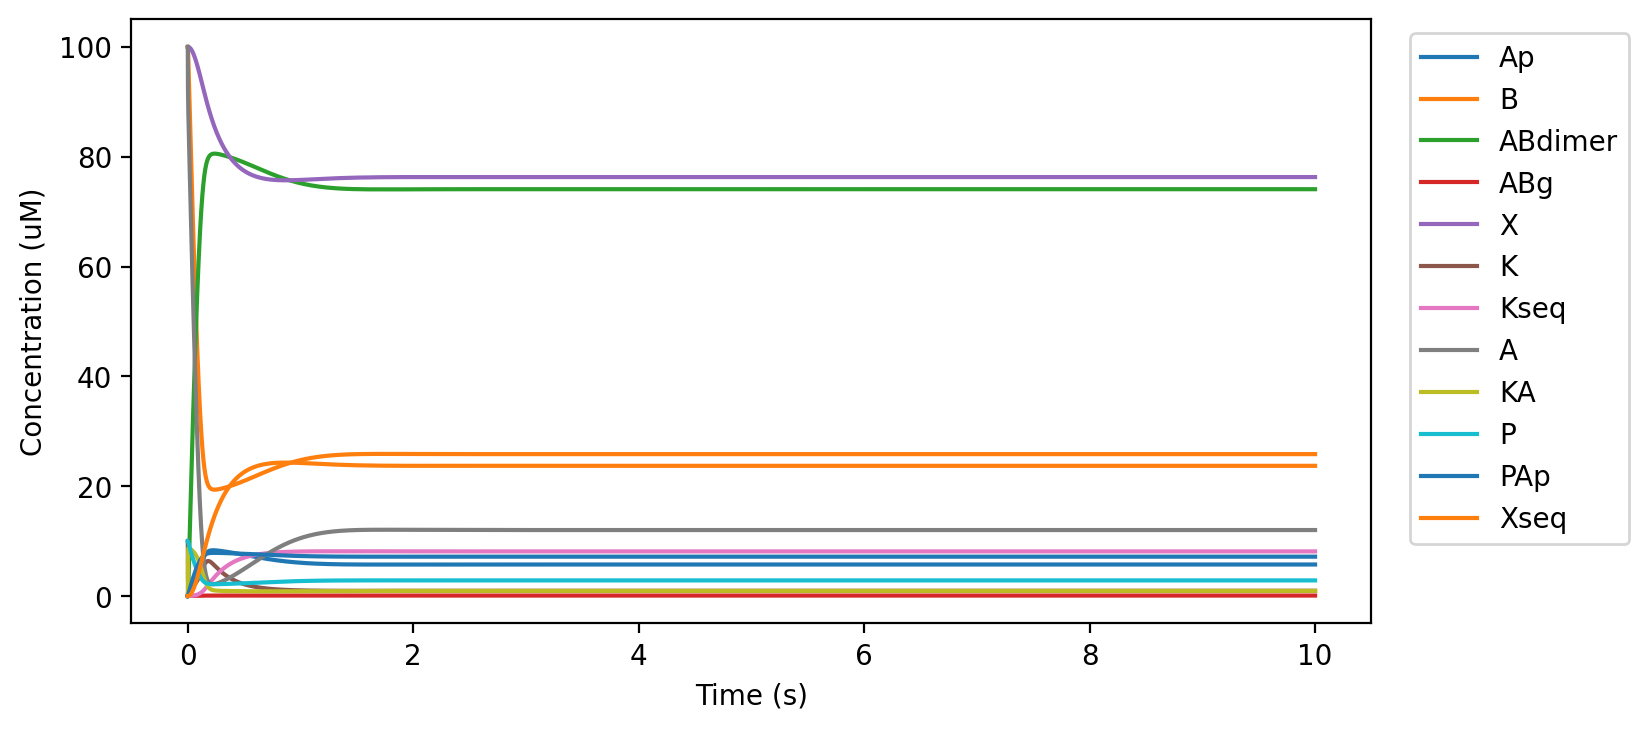

In [7]:
#plot Y 

fig = plt.figure(figsize=(8,4),dpi=200)
plt.plot(Ysol.t, Y[0,:], label = 'Ap')
plt.plot(Ysol.t, Y[1,:], label = 'B')
plt.plot(Ysol.t, Y[2,:], label = 'ABdimer')
plt.plot(Ysol.t, Y[3,:], label = 'ABg')
plt.plot(Ysol.t, Y[4,:], label = 'X')
plt.plot(Ysol.t, Y[5,:], label = 'K')
plt.plot(Ysol.t, Y[6,:], label = 'Kseq')
plt.plot(Ysol.t, Y[7,:], label = 'A')
plt.plot(Ysol.t, Y[8,:], label = 'KA')
plt.plot(Ysol.t, Y[9,:], label = 'P')
plt.plot(Ysol.t, Y[10,:], label = 'PAp')
plt.plot(Ysol.t, Y[11,:], label = 'Xseq')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (uM)')
plt.legend(loc = 'upper left', bbox_to_anchor = (1.02,1)) #prop={'size': 6}
plt.show()

In [15]:
Y

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 68
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 5.92113910e-07, 6.51325301e-06, 6.57246440e-05,
       4.19764543e-04, 1.05726516e-03, 1.85863236e-03, 2.92815241e-03,
       4.32694093e-03, 6.09747764e-03, 8.39889772e-03, 1.00100100e-02])
 t_events: None
        y: array([[0.00000000e+00, 1.30224048e-03, 1.42796270e-02, 1.39646299e-01,
        7.42956584e-01, 1.37701597e+00, 1.71759763e+00, 1.83581574e+00,
        1.80870809e+00, 1.72579286e+00, 1.64048148e+00, 1.60266377e+00],
       [1.00000000e+02, 9.99999996e+01, 9.99999534e+01, 9.99953594e+01,
        9.98329082e+01, 9.91424890e+01, 9.79212086e+01, 9.61212887e+01,
        9.38300525e+01, 9.11989063e+01, 8.82028493e+01, 8.63329503e+01],
       [0.00000000e+00, 3.85575993e-07, 4.65546837e-05, 4.64016651e-03,
        1.66999751e-01, 8.56356741e-01, 2.07409176e+00, 3.86586670e+00,
   